# CCGtools

## Installation

To install the full parser run the following command:

In [ ]:
! pip install -qU "ccgtools[parser]@git+https://github.com/stanojevic/ccgtools"

To have visualizations of CCG trees and dependencies you need to have GraphViz and LaTeX installed. You can do that with the following command:

In [ ]:
! apt update > /dev/null
! apt install -qq graphviz texlive-latex-extra latex-cjk-all dvipng > /dev/null

## Module usage

Most of the functionalities can be accessed trough the main module:

In [1]:
import ccg

In [2]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

### Pretrained English model
Models will be downloaded automatically

In [3]:
parser = ccg.parser("pretrained:English-RoBERTa")

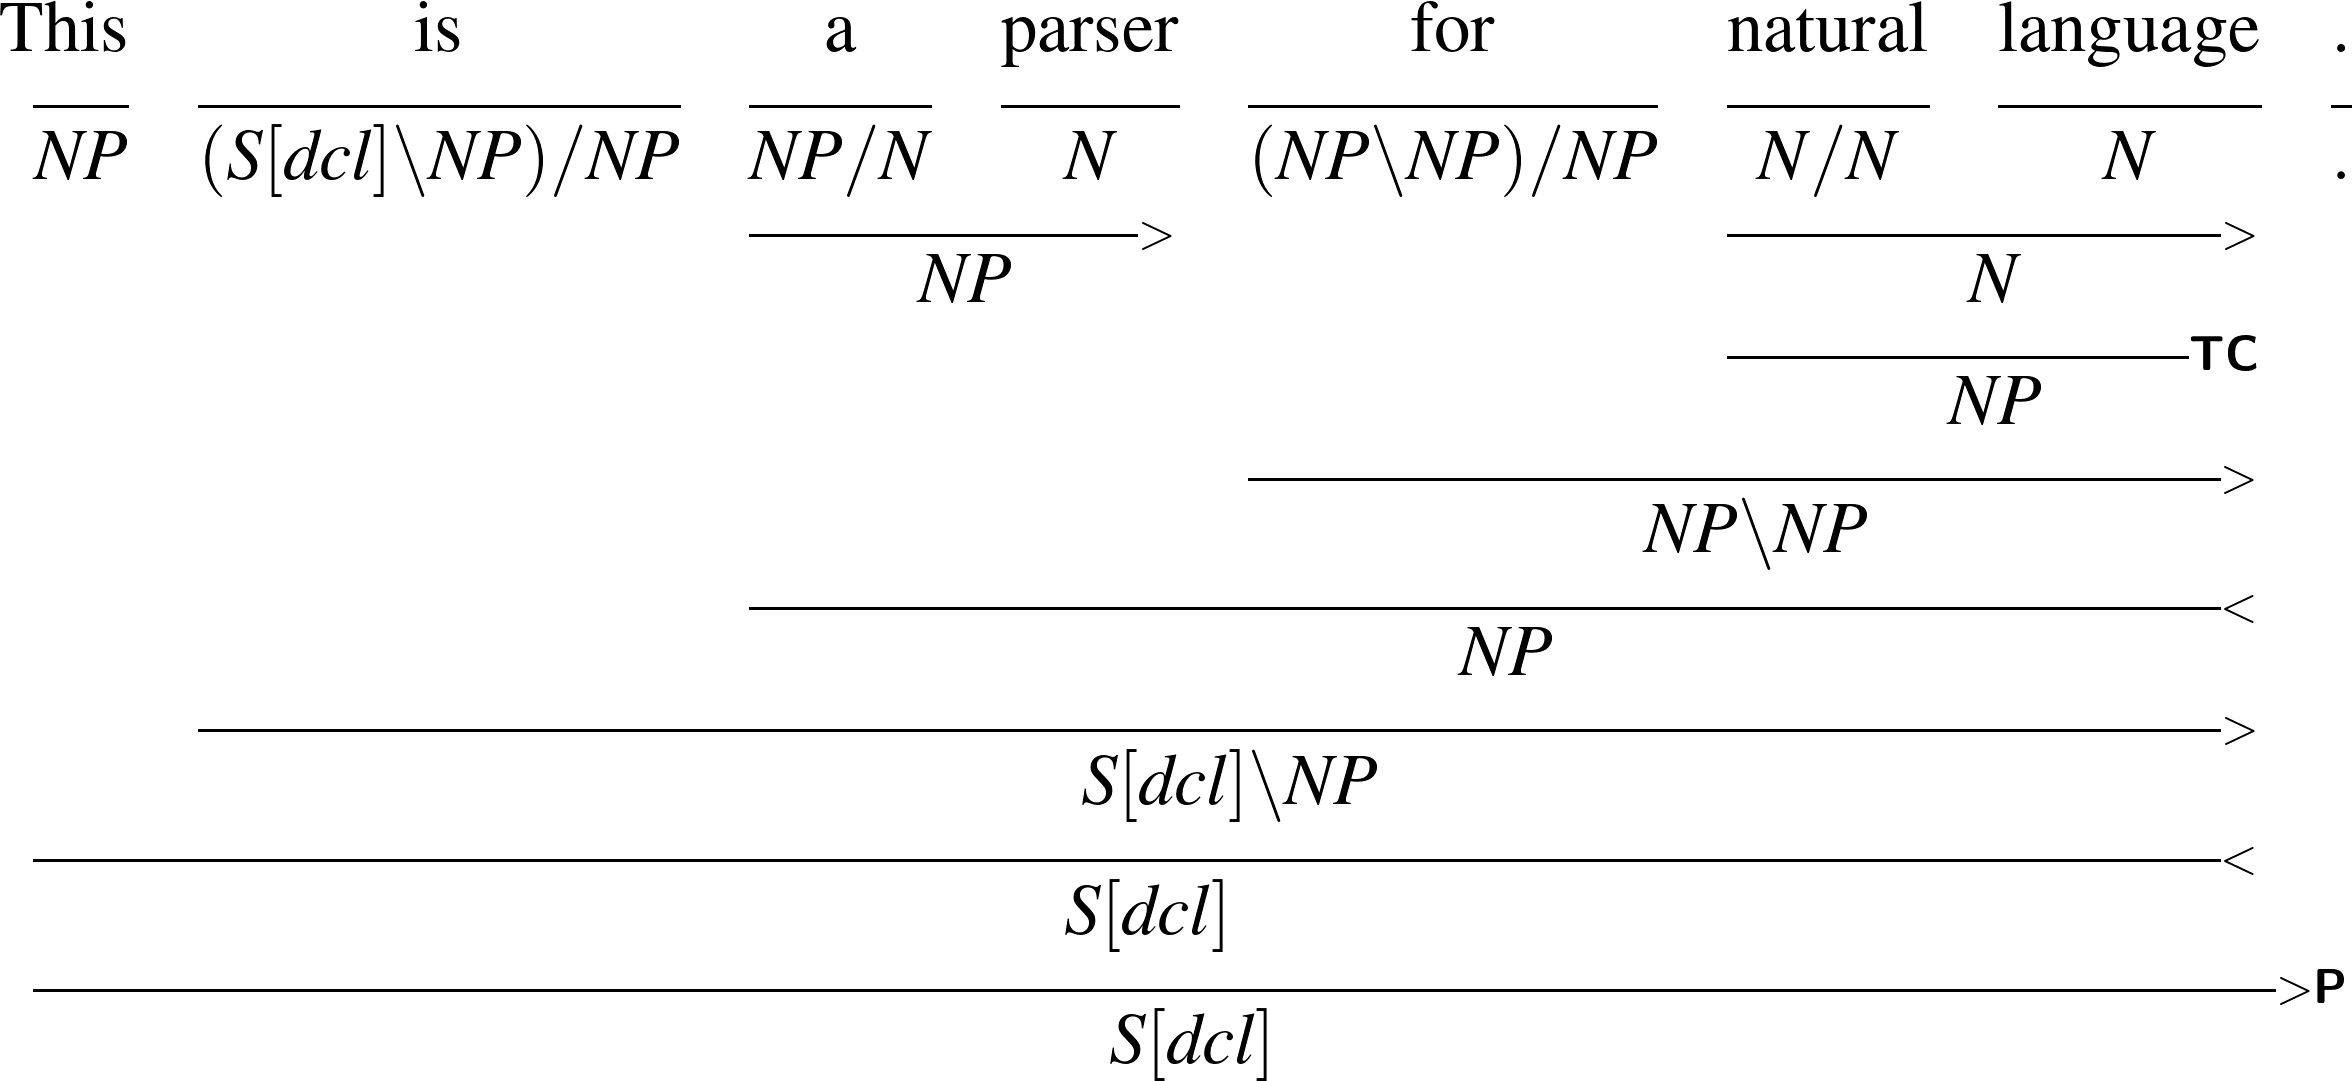

In [4]:
tree = parser.parse_sent("This is a parser for natural language.")
tree

In [5]:
print(tree.to_latex())

\documentclass{standalone}
\usepackage[UTF8]{ctex}  % in case there are Chinese characters
\usepackage{xcolor}  % this is for coloring logical formulas
\usepackage{mathptmx}  % this is for nicer looking lambdas
\usepackage{amsmath}  % this is for \operatorname
\usepackage{ccg}  % you can find the necessary style file ccg.sty in the repository of the parser
% currently available at https://raw.githubusercontent.com/stanojevic/ccgtools/main/ccg/ccg.sty
\usepackage{amsmath}
\begin{document}
\begin{CJK*}{UTF8}{gbsn}  % in case there are Chinese characters
\deriv{8}{
	\rm \text{This} & \rm \text{is} & \rm \text{a} & \rm \text{parser} & \rm \text{for} & \rm \text{natural} & \rm \text{language} & \rm \text{.}\\
	\uline{1} & \uline{1} & \uline{1} & \uline{1} & \uline{1} & \uline{1} & \uline{1} & \uline{1}\\
	\mc{1}{\it NP} & \mc{1}{\it (S[dcl]{\bs}NP)/NP} & \mc{1}{\it NP/N} & \mc{1}{\it N} & \mc{1}{\it (NP{\bs}NP)/NP} & \mc{1}{\it N/N} & \mc{1}{\it N} & \mc{1}{\it .}\\
	  &   & \fapply{2} &   

In [6]:
tree.deps()

#### With Semantics

It is possible to also compute semantics using logical forms in a compact way as described in  [this paper](https://iwcs2021.github.io/proceedings/iwcs/pdf/2021.iwcs-1.4.pdf). You just need to add ".with_semantics()" in the end of parsers call. Note that for some sentences this will fail because the lexical entries of logical forms are not having a wide coverage.

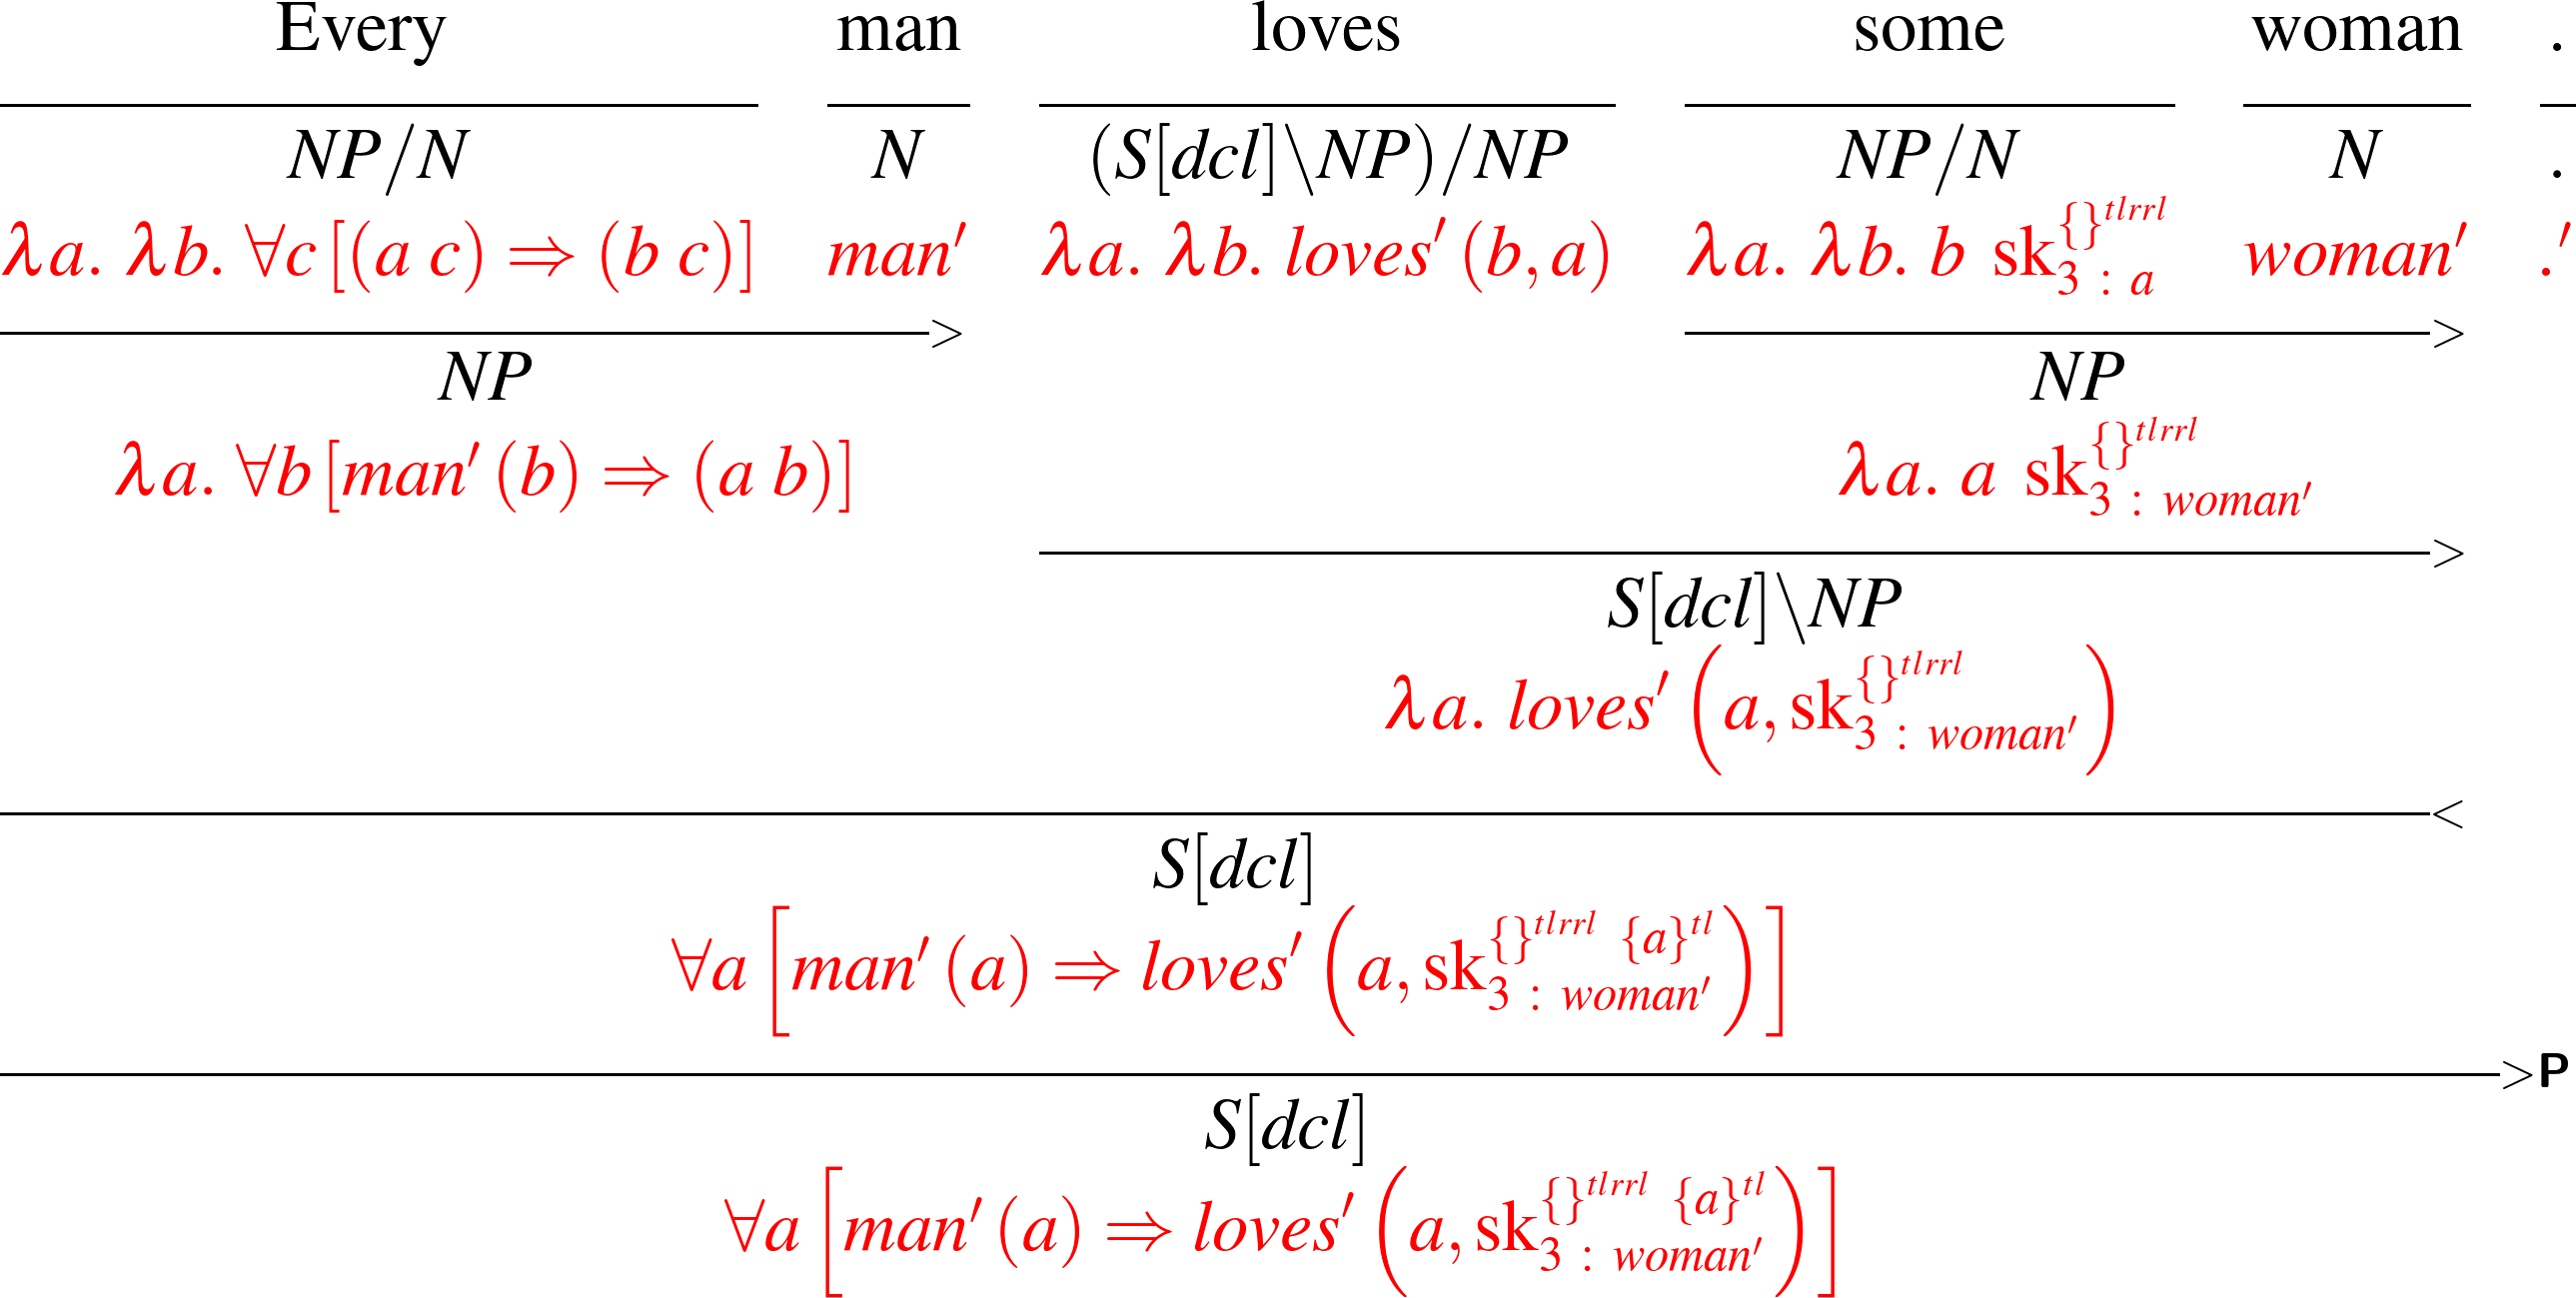

In [12]:
tree = parser.parse_sent("Every man loves some woman.").with_semantics()
tree

You can display all possible readings from this tree using the following code:

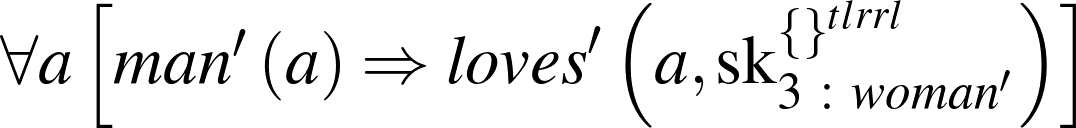

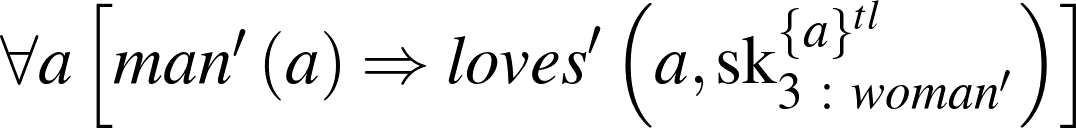

In [13]:
for reading in tree.all_readings():
    reading.display()

### Pretrained Chinese model

In [5]:
parser = ccg.parser("pretrained:Chinese-RoBERTa")

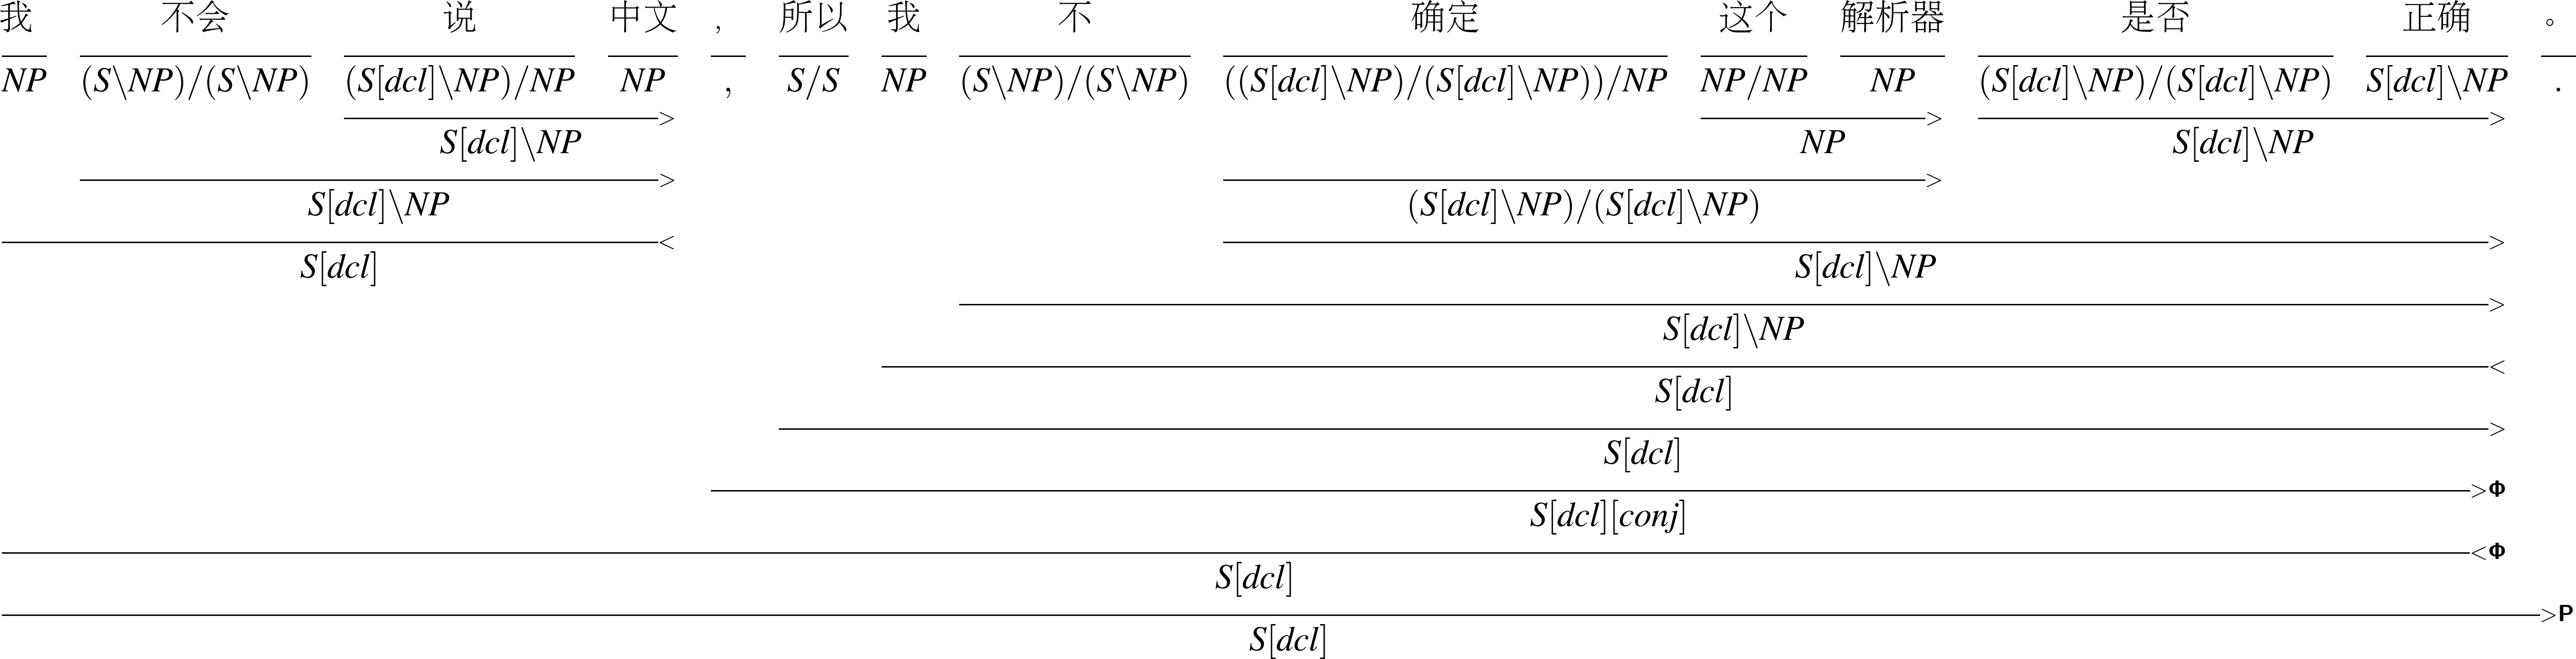

In [6]:
tree = parser.parse_sent("我不会说中文，所以我不确定这个解析器是否正确。")
tree

In [7]:
tree.deps()

### Pretrained English model that can handle questions and biomedical data

In [11]:
parser = ccg.parser("pretrained:English-RoBERTa-Questions")

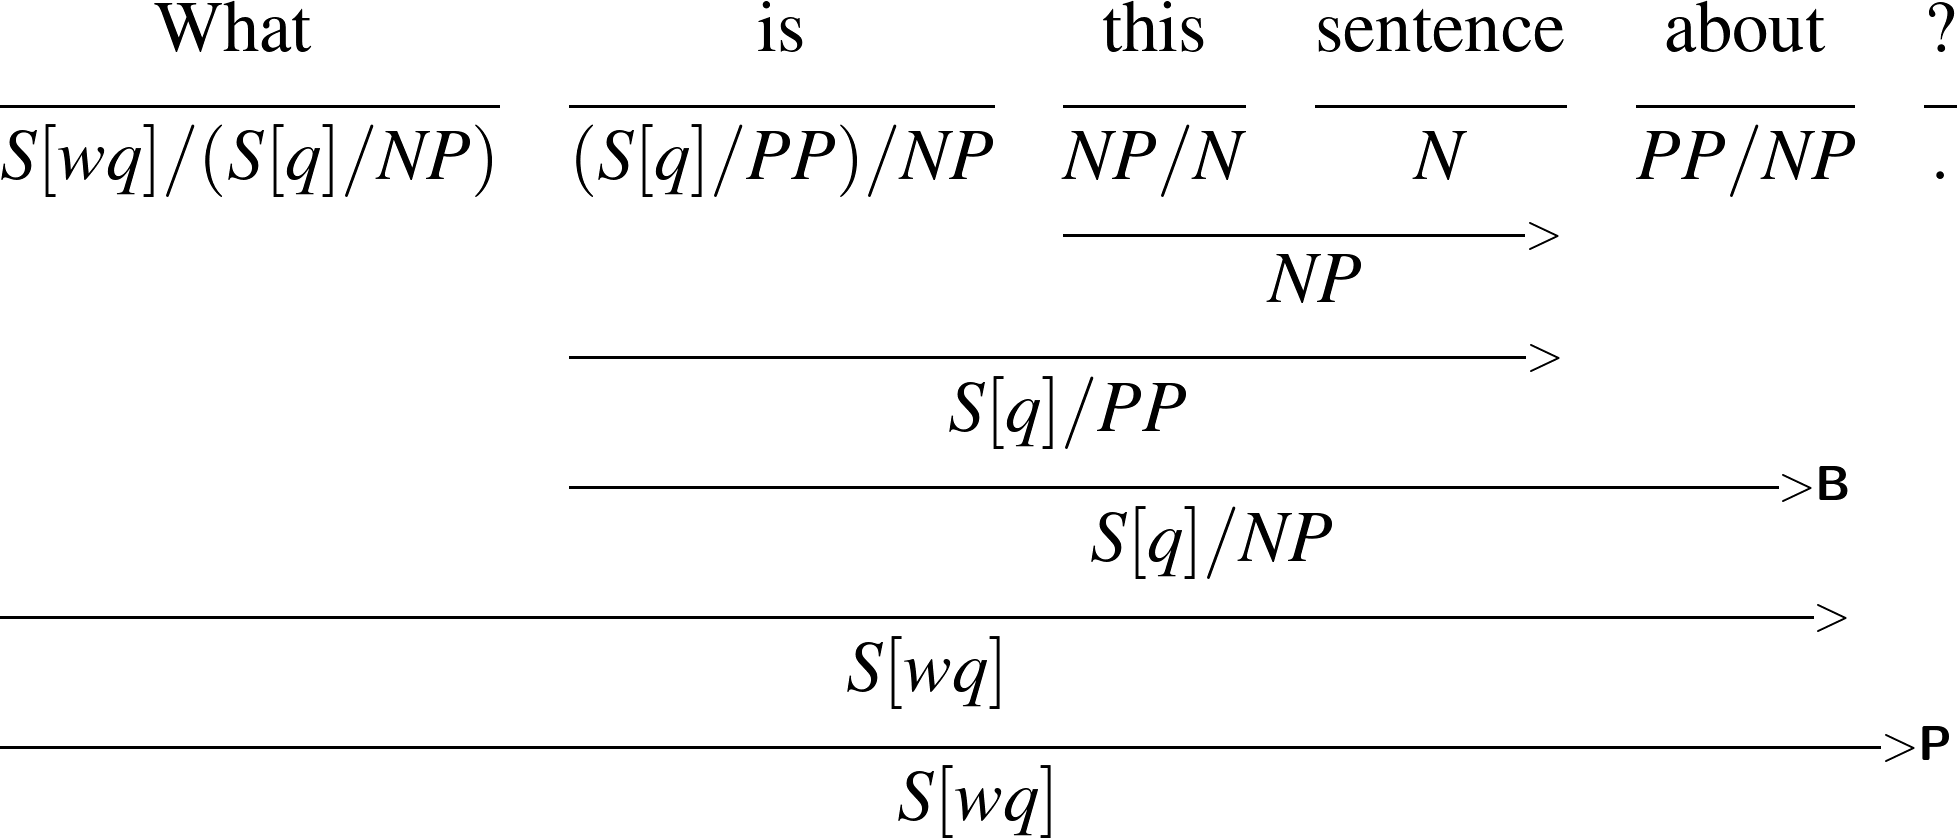

In [12]:
tree = parser.parse_sent("What is this sentence about?")
tree

In [13]:
tree.deps()